Линейная регрессия

In [ ]:
import random
import numpy as np

In [ ]:
# Функция для вычисления предсказания модели
def predict(x, w, b):
    return w * x + b

# Функция для вычисления среднеквадратичной ошибки (MSE)
def compute_cost(x, y, w, b):
    m = len(x)
    total_cost = 0
    for i in range(m):
        total_cost += (predict(x[i], w, b) - y[i]) ** 2
    return total_cost / (2 * m)

# Функция для обновления параметров w и b с помощью градиентного спуска
def gradient_descent(x, y, w, b, learning_rate, num_iterations):
    m = len(x)
    for _ in range(num_iterations):
        dw = 0
        db = 0
        for i in range(m):
            prediction = predict(x[i], w, b)
            dw += (prediction - y[i]) * x[i]
            db += (prediction - y[i])
        dw /= m
        db /= m
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# Пример данных
x = [1, 2, 3, 4, 5]  # Признаки
y = [2, 4, 5, 4, 5]  # Целевые значения

# Инициализация параметров
w = random.random()
b = random.random()

# Гиперпараметры
learning_rate = 0.01
num_iterations = 1000

# Обучение модели
w, b = gradient_descent(x, y, w, b, learning_rate, num_iterations)

# Вывод результатов
print(f"Обученные параметры: w = {w}, b = {b}")

# Предсказание на новых данных
new_x = 6
predicted_y = predict(new_x, w, b)
print(f"Предсказание для x = {new_x}: y = {predicted_y}")

Обученные параметры: w = 0.6896881021311233, b = 1.876197493425944
Предсказание для x = 6: y = 6.014326106212684


In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Инициализация параметров
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.num_iterations):
            # Предсказание
            y_pred = np.dot(X, self.weights) + self.bias

            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [ ]:
# Пример данных
# X - матрица признаков (n_samples x n_features)
# y - вектор целевых значений (n_samples)
X = np.array([[1, 2, 2], [2, 3, 1], [3, 4, 7], [4, 5, 6], [5, 6, 1]])
y = np.array([3, 5, 7, 9, 11])

# Создание и обучение модели
model = LinearRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X, y)

# Вывод обученных параметров
print("Обученные веса:", model.weights)
print("Обученное смещение:", model.bias)

# Предсказание на новых данных
new_X = np.array([[6, 7, 2], [7, 8, 7]])
predictions = model.predict(new_X)
print("Предсказания для новых данных:", predictions)

[-0.00389338  0.00204178 -0.00039539]
Обученные веса: [ 0.97859924  1.01122304 -0.00217333]
Обученное смещение: 0.032623806418183555
Предсказания для новых данных: [12.97843389 14.95738952]


In [ ]:
print(X)
print(X.T)

[[1 2 2]
 [2 3 1]
 [3 4 7]
 [4 5 6]
 [5 6 1]]
[[1 2 3 4 5]
 [2 3 4 5 6]
 [2 1 7 6 1]]


In [ ]:
weights = np.zeros(3)
bias = 0

In [ ]:
y_pred = np.dot(X,weights.T) + bias
y_pred

array([0., 0., 0., 0., 0.])

**Логистическая регрессия **

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        """Сигмоидная функция."""
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        """Вычисление функции потерь (Log Loss)."""
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y):
        """Обучение модели."""
        n_samples, n_features = X.shape

        # Инициализация параметров
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for _ in range(self.num_iterations):
            # Линейная комбинация
            z = np.dot(X, self.weights) + self.bias
            # Предсказанные вероятности
            y_pred = self._sigmoid(z)

            # Градиенты
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        """Предсказание вероятностей."""
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        """Предсказание классов."""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# Пример использования
if __name__ == "__main__":
    # Пример данных
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([0, 0, 1, 1, 1])

    # Создание и обучение модели
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Предсказание
    predictions = model.predict(X)
    print("Предсказанные классы:", predictions)

Предсказанные классы: [0 0 1 1 1]


Алгоритм KNN

Точность модели: 80.00%


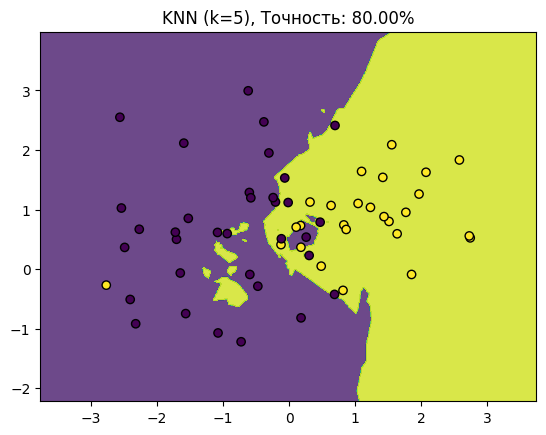

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        """Сохраняем обучающие данные."""
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distance(self, x1, x2):
        """Вычисление евклидова расстояния между двумя точками."""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """Предсказание для тестовых данных."""
        predictions = []
        for x in X_test:
            # Вычисляем расстояния до всех объектов обучающей выборки
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            # Находим индексы k ближайших соседей
            k_indices = np.argsort(distances)[:self.k]
            # Берем классы k ближайших соседей
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            # Выбираем наиболее часто встречающийся класс
            most_common = np.bincount(k_nearest_labels).argmax()
            predictions.append(most_common)
        return np.array(predictions)

# Создание синтетических данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели KNN
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

# Визуализация данных и предсказаний
def plot_decision_boundary(X, y, model):
    """Отрисовка границы решения."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f"KNN (k={model.k}), Точность: {accuracy * 100:.2f}%")
    plt.show()

# Отрисовка границы решения
plot_decision_boundary(X_test, y_test, knn)

Наивный Байесовский классификатор

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class NaiveBayes:
    def __init__(self):
        self.class_probs = None  # Априорные вероятности классов
        self.feature_probs = None  # Условные вероятности признаков

    def fit(self, X, y):
        """Обучение модели."""
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Вычисление априорных вероятностей классов
        self.class_probs = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_probs[i] = np.sum(y == c) / n_samples

        # Вычисление условных вероятностей признаков
        self.feature_probs = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]  # Данные для текущего класса
            feature_prob = []
            for j in range(n_features):
                # Вычисляем среднее и стандартное отклонение для каждого признака
                mean = np.mean(X_c[:, j])
                std = np.std(X_c[:, j])
                feature_prob.append((mean, std))
            self.feature_probs.append(feature_prob)

    def _calculate_likelihood(self, x, mean, std):
        """Вычисление правдоподобия с использованием нормального распределения."""
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

    def predict(self, X):
        """Предсказание классов для новых данных."""
        n_samples, n_features = X.shape
        n_classes = len(self.classes)
        predictions = []

        for x in X:
            posteriors = []
            for i, c in enumerate(self.classes):
                # Начинаем с априорной вероятности класса
                posterior = np.log(self.class_probs[i])
                for j in range(n_features):
                    mean, std = self.feature_probs[i][j]
                    # Добавляем логарифм правдоподобия
                    posterior += np.log(self._calculate_likelihood(x[j], mean, std))
                posteriors.append(posterior)
            # Выбираем класс с наибольшей апостериорной вероятностью
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

# Создание синтетических данных
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = nb.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

# Визуализация данных и предсказаний
def plot_decision_boundary(X, y, model):
    """Отрисовка границы решения."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f"Наивный Байес, Точность: {accuracy * 100:.2f}%")
    plt.show()

# Отрисовка границы решения
plot_decision_boundary(X_test, y_test, nb)